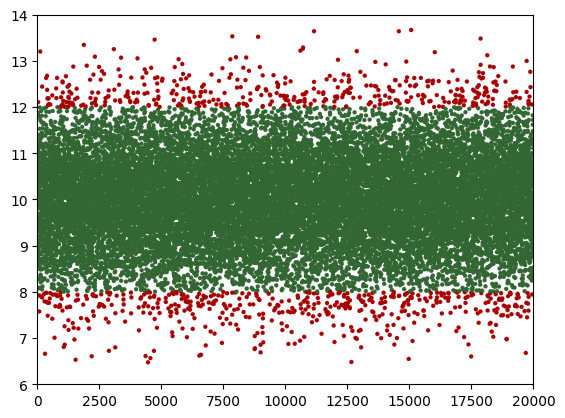

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


a = np.random.randn(20000) + 10
b = np.empty(a.size, dtype=bool)
colors = []

for num in a:
    if num > 12 or num < 8:
        np.append(b, False)
        colors.append('#A80000')
    else:
        np.append(b, True)
        colors.append('#326633')


xdata = np.arange(0, 20000)
ydata = a
plt.xlim([0, 20000])
plt.ylim([6, 14])
plt.scatter(xdata, ydata, marker='.', linewidths=0.1, c=colors)

d = {'tlaky[p]': a, 'labely': b}
do = pd.DataFrame(data=d)
do.to_csv('datavylisku.csv')




